In [234]:
import pandas as pd
vcf = pd.read_pickle("../preprocess_genetic/all_vcfs.pkl")
c = pd.read_csv("../preprocess_clinical/clinical.csv").drop("Unnamed: 0", axis=1).rename(columns={"PTID":"subject"})
img = pd.read_pickle('../preprocess_images/mri_meta_v.pkl')[["img_array", "subject", "label"]]

In [235]:
vcf = vcf.rename(columns = {"Subject":"subject"})
vcf = vcf.rename(columns = {"Group":"GROUP"})
vcf

,subject,GROUP,12116,12117,12118,12119,12120,12121,12122,12123,...,599531,599532,599533,599534,599535,599536,599537,599538,599539,599540
0,011_S_0002,0.0,1,0,0,1,1,1,1,1,...,2,0,2,0,2,2,2,2,2,2
1,011_S_0008,0.0,1,0,0,1,1,1,1,1,...,2,0,2,0,1,2,2,2,2,2
2,100_S_0015,0.0,1,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,023_S_0031,0.0,1,0,0,1,1,1,1,1,...,1,0,1,0,1,1,1,1,1,1
4,011_S_0021,0.0,0,1,0,1,0,0,0,1,...,1,0,2,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,072_S_4610,1.0,1,1,0,2,1,1,1,2,...,1,0,2,0,1,1,1,1,1,1
775,072_S_4613,1.0,2,0,0,2,2,2,2,2,...,2,0,2,0,0,2,2,2,2,2
776,153_S_4621,1.0,0,1,0,1,0,0,0,1,...,1,0,1,0,1,1,1,1,1,1
777,005_S_4707,2.0,1,0,0,1,1,1,1,1,...,1,0,2,0,0,2,2,2,2,2


In [155]:
# img = img.rename(columns = {'label': "GROUP"})
img

,img_array,subject,label
0,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",036_S_1001,2
1,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",133_S_0488,0
2,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",127_S_0393,1
3,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",067_S_0812,2
4,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",109_S_0950,1
...,...,...,...
626,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",057_S_0474,2
627,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",007_S_0316,2
628,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",022_S_0130,0
629,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",007_S_0249,1


In [292]:
img.img_array

0      [[[0.8857956737343409, 350.30514567693206, 0.0...
1      [[[53.81804723140711, 33.719671215292735, 0.44...
2      [[[37.25097842030509, 13.825308018577102, 16.3...
3      [[[98.49043058598744, 9.688220563095742, 0.0],...
4      [[[0.5992967131414193, 11.897896465357594, 0.0...
                             ...                        
437    [[[12.35101956540803, 39.56338117162984, 18.77...
438    [[[53.743898415750905, 0.0, 0.0], [59.15608305...
439    [[[37.286444876118956, 70.28789662056991, 0.07...
440    [[[13.320282425212465, 139.58136265434734, 0.0...
441    [[[37.99036707811047, 32.5024857058262, 3.4910...
Name: img_array, Length: 442, dtype: object

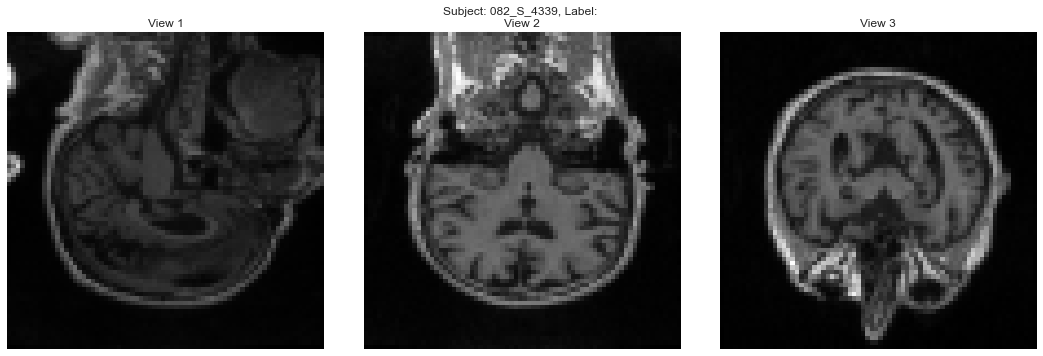

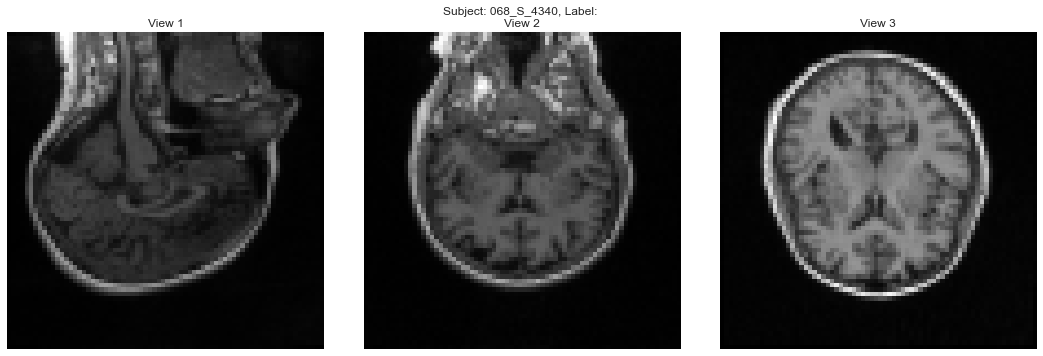

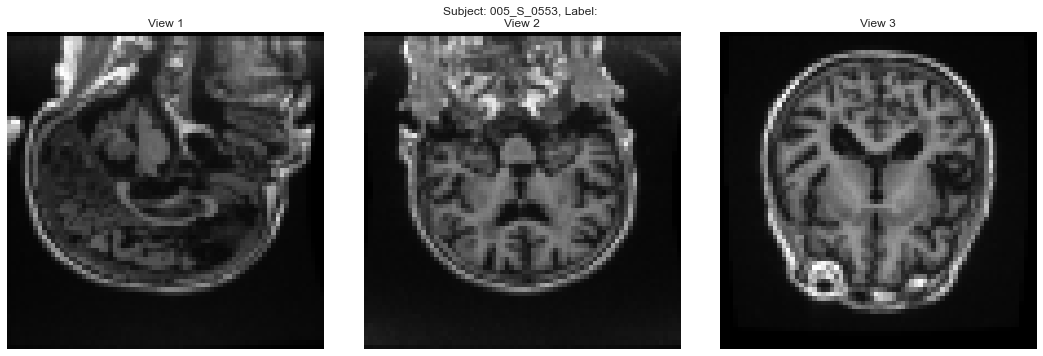

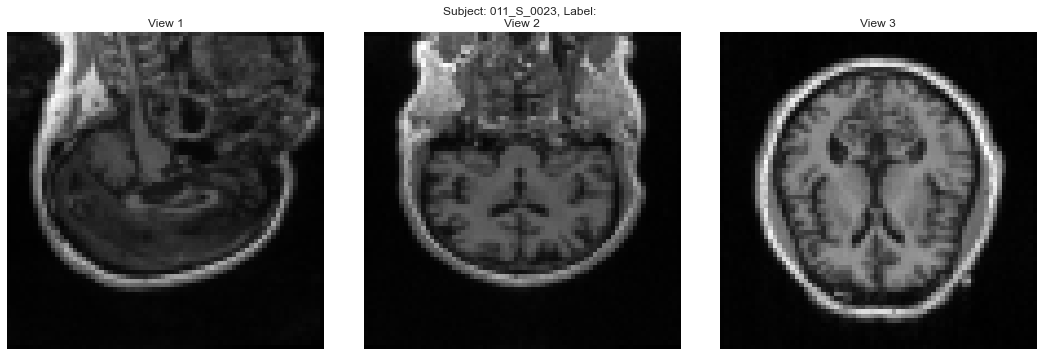

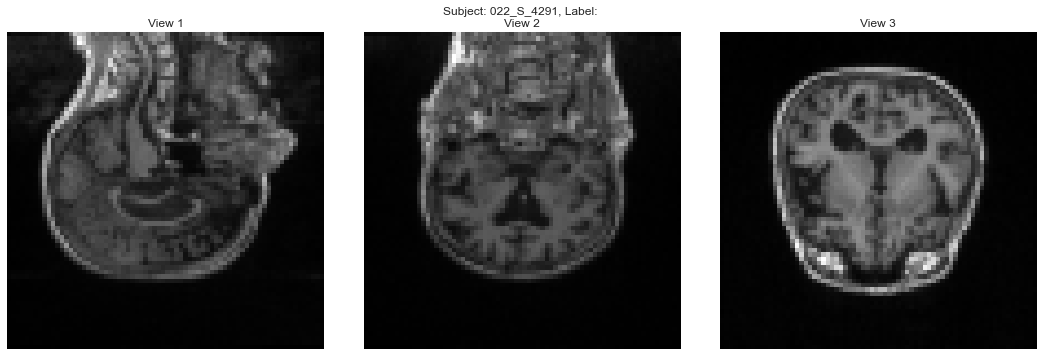

In [297]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def visualize_mri_from_pickle(pickle_path, index=0):
    """
    从pickle文件中加载并可视化MRI图像
    
    参数:
    pickle_path: pickle文件的路径
    index: 要显示的图像索引，默认为0
    """
    # 加载pickle文件
    df = pd.read_pickle(pickle_path)
    
    # 获取指定索引的图像数据
    img_data = df.iloc[index]['img_array']
    # label = df.iloc[index]['label']
    subject = df.iloc[index]['subject']
    
    # 创建一个3x1的子图
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f'Subject: {subject}, Label: ')
    
    # 显示三个视角的图像
    for i in range(3):
        axes[i].imshow(img_data[:,:,i], cmap='gray')
        axes[i].axis('off')
        axes[i].set_title(f'View {i+1}')
    
    plt.tight_layout()
    plt.show()

def browse_mri_dataset(pickle_path):
    """
    浏览数据集中的所有图像
    
    参数:
    pickle_path: pickle文件的路径
    """
    df = pd.read_pickle(pickle_path)
    print(f"数据集中共有 {len(df)} 张图像")
    
    # 打印数据集的基本信息
    print("\n标签分布:")
    print(df['label'].value_counts())
    
    return df

for i in range(5):  # 查看前5张图像
    visualize_mri_from_pickle("../preprocess_overlap/X_train_img.pkl", index=i)

## Test Area

In [ ]:
test_img = pd.read_csv('/Users/yanicewan/Downloads/Cohort_7_MRI_Processed_Images_30Nov2024.csv')
len(test_img.subject_id.unique())
common_subjects = set(c['subject']).intersection(set(test_img['subject_id'])).intersection(set(vcf['subject']))
len(common_subjects)

<ipython-input-175-bb30497fc104>:1: DtypeWarning: Columns (53,54,55,57,58) have mixed types. Specify dtype option on import or set low_memory=False.
  test_img = pd.read_csv('/Users/yanicewan/Downloads/Cohort_7_MRI_Processed_Images_30Nov2024.csv')


657

In [232]:
test_img = pd.read_csv('/Users/yanicewan/Downloads/test_all_11_30_2024.csv')
print(len(test_img.Subject.unique()))
exact_string = 'MT1; GradWarp; N3m'
# filtered_df1 = test_img[(test_img['Description'] == exact_string) & (test_img['Visit'].str.startswith('v'))]
# filtered_df1 = test_img[(test_img['Description'] == exact_string)]
filtered_df1 = test_img[(test_img['Description'] == exact_string) & (test_img['Visit'] == 'v11') | (test_img['Visit'] == 'v02')]

common_subjects = set(c['subject']).intersection(set(filtered_df1['Subject'])).intersection(set(vcf['subject']))
print(len(common_subjects))

1250
234


In [224]:
import pandas as pd

# 读取数据
test_img = pd.read_csv('/Users/yanicewan/Downloads/test_all_11_30_2024.csv')
exact_string = 'MT1; GradWarp; N3m'

# 1. 首先看看v11的重合情况
v11_df = test_img[(test_img['Description'] == exact_string) & (test_img['Visit'] == 'v11')]
v11_common = set(c['subject']).intersection(set(v11_df['Subject'])).intersection(set(vcf['subject']))
print(f"v11访视重合的受试者数量: {len(v11_common)}")

# 2. 检查每个访视时间点的重合情况
visit_types = test_img['Visit'].unique()
visit_overlaps = {}

for visit in visit_types:
    visit_df = test_img[(test_img['Description'] == exact_string) & (test_img['Visit'] == visit)]
    common = set(c['subject']).intersection(set(visit_df['Subject'])).intersection(set(vcf['subject']))
    visit_overlaps[visit] = len(common)
    print(f"{visit}访视重合的受试者数量: {len(common)}")

# 3. 查看如果组合不同访视，重合subject会如何变化
# 从重合数最多的访视开始，逐步添加其他访视
all_subjects = set()
visit_contribution = []

sorted_visits = sorted(visit_overlaps.items(), key=lambda x: x[1], reverse=True)
cumulative_subjects = set()

for visit, _ in sorted_visits:
    visit_df = test_img[(test_img['Description'] == exact_string) & (test_img['Visit'] == visit)]
    current_subjects = set(c['subject']).intersection(set(visit_df['Subject'])).intersection(set(vcf['subject']))
    new_subjects = current_subjects - cumulative_subjects
    cumulative_subjects.update(new_subjects)
    
    visit_contribution.append({
        'Visit': visit,
        'New_Subjects_Added': len(new_subjects),
        'Cumulative_Total': len(cumulative_subjects)
    })
    print(f"添加{visit}访视后:")
    print(f"- 新增{len(new_subjects)}个受试者")
    print(f"- 累计总数达到{len(cumulative_subjects)}个受试者")

# 输出最优组合建议
df_contribution = pd.DataFrame(visit_contribution)
print("\n最优访视组合建议:")
significant_visits = df_contribution[df_contribution['New_Subjects_Added'] > 0]['Visit'].tolist()
print(f"建议使用的访视组合: {', '.join(significant_visits)}")
print(f"最终可获得的总受试者数量: {len(cumulative_subjects)}")

v11访视重合的受试者数量: 172
m06访视重合的受试者数量: 0
m36访视重合的受试者数量: 15
sc访视重合的受试者数量: 0
v06访视重合的受试者数量: 83
m24访视重合的受试者数量: 2
m12访视重合的受试者数量: 0
v11访视重合的受试者数量: 172
m48访视重合的受试者数量: 66
v31访视重合的受试者数量: 26
v21访视重合的受试者数量: 125
bl访视重合的受试者数量: 0
v41访视重合的受试者数量: 56
m18访视重合的受试者数量: 0
v02访视重合的受试者数量: 133
v04访视重合的受试者数量: 125
v05访视重合的受试者数量: 123
v51访视重合的受试者数量: 6
v01访视重合的受试者数量: 0
init访视重合的受试者数量: 1
m60访视重合的受试者数量: 23
scmri访视重合的受试者数量: 0
m03访视重合的受试者数量: 0
uns1访视重合的受试者数量: 0
nv访视重合的受试者数量: 1
m72访视重合的受试者数量: 3
tau访视重合的受试者数量: 0
添加v11访视后:
- 新增172个受试者
- 累计总数达到172个受试者
添加v02访视后:
- 新增26个受试者
- 累计总数达到198个受试者
添加v21访视后:
- 新增5个受试者
- 累计总数达到203个受试者
添加v04访视后:
- 新增0个受试者
- 累计总数达到203个受试者
添加v05访视后:
- 新增0个受试者
- 累计总数达到203个受试者
添加v06访视后:
- 新增21个受试者
- 累计总数达到224个受试者
添加m48访视后:
- 新增15个受试者
- 累计总数达到239个受试者
添加v41访视后:
- 新增1个受试者
- 累计总数达到240个受试者
添加v31访视后:
- 新增0个受试者
- 累计总数达到240个受试者
添加m60访视后:
- 新增1个受试者
- 累计总数达到241个受试者
添加m36访视后:
- 新增2个受试者
- 累计总数达到243个受试者
添加v51访视后:
- 新增1个受试者
- 累计总数达到244个受试者
添加m72访视后:
- 新增0个受试者
- 累计总数达到244个受试者
添加m24访视后:
- 新增0个受试者
- 累计总数达到244个受试者
添加init访视后:
- 

In [225]:
import pandas as pd

# 读取数据
test_img = pd.read_csv('/Users/yanicewan/Downloads/test_all_11_30_2024.csv')
exact_string = 'MT1; GradWarp; N3m'

# 首先筛选出符合Description条件的数据
filtered_df = test_img[test_img['Description'] == exact_string]

# 创建访视时间的顺序映射
visit_order = {
    'v06': 6,
    'v11': 11,
    'v21': 21,
    'm36': 36,
    'm48': 48
}

# 添加数值形式的访视时间
filtered_df['visit_month'] = filtered_df['Visit'].map(visit_order)

# 对每个subject选择最新的一条记录
latest_records = filtered_df.sort_values('visit_month').groupby('Subject').last().reset_index()

# 计算每个label的数量
label_counts = latest_records['Group'].value_counts()

print("每个诊断标签的数量：")
print(label_counts)

# 如果需要查看具体的月份分布
visit_distribution = latest_records['Visit'].value_counts()
print("\n最后一次访视的分布：")
print(visit_distribution)

每个诊断标签的数量：
Group
CN     287
MCI    167
AD     123
Name: count, dtype: int64

最后一次访视的分布：
Visit
v02      133
m48       86
v04       83
v05       65
v41       40
v31       38
m60       36
m36       24
v21       20
v11       12
v51       10
v06        7
m24        7
m12        4
m72        3
m06        3
scmri      2
v01        1
nv         1
m18        1
sc         1
Name: count, dtype: int64


<ipython-input-225-4f95c39395df>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['visit_month'] = filtered_df['Visit'].map(visit_order)


In [217]:
test_img = pd.read_csv('/Users/yanicewan/Downloads/visit-mt1_11_30_2024 (2).csv')
print(len(test_img.Subject.unique()))
exact_string = 'MT1; GradWarp; N3m'
# filtered_df1 = test_img[(test_img['Description'] == exact_string) & (test_img['Visit'].str.startswith('v'))]
filtered_df1 = test_img[(test_img['Description'] == exact_string)]

common_subjects = set(c['subject']).intersection(set(filtered_df1['Subject'])).intersection(set(vcf['subject']))
print(len(common_subjects))

878
182


In [219]:
test_img = pd.read_csv('/Users/yanicewan/Downloads/none2.csv')
print(len(test_img.Subject.unique()))
exact_string = 'MT1; GradWarp; N3m'
# filtered_df1 = test_img[(test_img['Description'] == exact_string) & (test_img['Visit'].str.startswith('v'))]
filtered_df1 = test_img[(test_img['Description'] == exact_string)]

common_subjects = set(c['subject']).intersection(set(filtered_df1['Subject'])).intersection(set(vcf['subject']))
print(len(common_subjects))

1161
133


In [222]:


test_img = pd.read_csv('/Users/yanicewan/Downloads/none3_12_01_2024.csv')
print(len(test_img.Subject.unique()))
exact_string = 'MT1; GradWarp; N3m'
# filtered_df1 = test_img[(test_img['Description'] == exact_string) & (test_img['Visit'].str.startswith('v'))]
filtered_df1 = test_img[(test_img['Description'] == exact_string)]

common_subjects = set(c['subject']).intersection(set(filtered_df1['Subject'])).intersection(set(vcf['subject']))
print(len(common_subjects))

456
172


In [233]:
# v11+v02_12_01_2024.csv

test_img = pd.read_csv('/Users/yanicewan/Downloads/v11+v02_12_01_2024.csv')
print(len(test_img.Subject.unique()))
exact_string = 'MT1; GradWarp; N3m'
# filtered_df1 = test_img[(test_img['Description'] == exact_string) & (test_img['Visit'].str.startswith('v'))]
filtered_df1 = test_img[(test_img['Description'] == exact_string)]

common_subjects = set(c['subject']).intersection(set(filtered_df1['Subject'])).intersection(set(vcf['subject']))
print(len(common_subjects))

437
197


In [177]:
common_subjects = set(c['subject']).intersection(set(test_img['subject_id'])).intersection(set(vcf['subject']))
len(common_subjects)

99

In [157]:
common_subjects = set(c['subject']).intersection(set(vcf['subject']))
len(common_subjects)

576

In [138]:
common_subjects = set(c['subject']).intersection(set(img['subject'])).intersection(set(vcf['subject']))

In [139]:
len(common_subjects)

78

# Continue

In [236]:
c = c.rename(columns = {"Group":"GROUP"})

In [237]:
a = vcf.merge(c, on = ["subject", "GROUP"]).merge(img, on = "subject")

In [238]:
a["subject"].value_counts()

subject
023_S_0031    1
068_S_4174    1
033_S_4176    1
094_S_4560    1
073_S_4559    1
             ..
068_S_4424    1
129_S_4396    1
129_S_4369    1
116_S_4043    1
005_S_4707    1
Name: count, Length: 172, dtype: int64

In [242]:
a["GROUP"].value_counts()

GROUP
0.0    119
2.0     34
1.0     19
Name: count, dtype: int64

In [243]:
cols = list(set(a.columns) - set(["PTID", "label", "GROUP",
                                  "RID", "ID", "Group", "Phase", "SITEID", "VISCODE", "VISCODE2", "USERDATE", "USERDATE2", "update_stamp", "DX", "Unnamed: 0"]))

In [244]:
X= a[cols]
y = a["GROUP"]

In [283]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=177)

In [284]:
X_test[["subject"]].to_csv("overlap_test_set.csv")

In [285]:
snp_cols = list(set(X_train.columns).intersection(set(vcf.columns)))


In [286]:
X_train_snp = X_train[snp_cols]
X_test_snp = X_test[snp_cols]

In [287]:
img_cols = list(set(X_train.columns).intersection(set(img.columns)))
print(len(img.columns))
print(len(img_cols))
X_train_img = X_train[img_cols]
X_test_img = X_test[img_cols]

3
2


In [288]:
clin_cols = list(set(X_train.columns).intersection(set(c.columns)))
print(len(c.columns))
print(len(clin_cols))
X_train_clin = X_train[clin_cols]
X_test_clin = X_test[clin_cols]

153
150


In [289]:
pd.DataFrame(X_train_snp).to_pickle("X_train_snp.pkl")
pd.DataFrame(X_test_snp).to_pickle("X_test_snp.pkl")
pd.DataFrame(y_train).to_pickle("y_train.pkl")
pd.DataFrame(y_test).to_pickle("y_test.pkl")

pd.DataFrame(X_train_clin).to_pickle("X_train_clinical.pkl")
pd.DataFrame(X_test_clin).to_pickle("X_test_clinical.pkl")

pd.DataFrame(X_train_img).to_pickle("X_train_img.pkl")
pd.DataFrame(X_test_img).to_pickle("X_test_img.pkl")

---------------------------------------------------------------------------------------------------------

In [290]:
X_train_clin = X_train_clin.drop(columns = "subject")
X_test_clin = X_test_clin.drop(columns = "subject")

X_train_snp = X_train_snp.drop(columns = "subject")
X_test_snp = X_test_snp.drop(columns = "subject")


In [291]:
pd.DataFrame(X_train_snp).to_csv("X_train_snp.csv", index=False)
pd.DataFrame(X_test_snp).to_csv("X_test_snp.csv", index=False)
pd.DataFrame(y_train).to_csv("y_train.csv", index=False, header=["label"])
pd.DataFrame(y_test).to_csv("y_test.csv", index=False, header=["label"])

pd.DataFrame(X_train_clin).to_csv("X_train_clinical.csv", index=False)
pd.DataFrame(X_test_clin).to_csv("X_test_clinical.csv", index=False)

In [259]:
# 获取各数据集的subject集合
vcf_subjects = set(vcf.subject)
clinical_subjects = set(c['subject'])
img_subjects = set(img['subject'])

# 计算各种组合的交集数量
all_overlap = len(vcf_subjects & clinical_subjects & img_subjects)
vcf_clinical = len(vcf_subjects & clinical_subjects)
vcf_img = len(vcf_subjects & img_subjects)
clinical_img = len(clinical_subjects & img_subjects)

# 计算每个数据集的总数
vcf_total = len(vcf_subjects)
clinical_total = len(clinical_subjects)
img_total = len(img_subjects)

print(f"基因数据集subjects数量: {vcf_total}")
print(f"临床数据集subjects数量: {clinical_total}")
print(f"影像数据集subjects数量: {img_total}")
print(f"基因+临床共有subjects: {vcf_clinical}")
print(f"基因+影像共有subjects: {vcf_img}")
print(f"临床+影像共有subjects: {clinical_img}")
print(f"三个数据集共有subjects: {all_overlap}")

基因数据集subjects数量: 779
临床数据集subjects数量: 2334
影像数据集subjects数量: 437
基因+临床共有subjects: 576
基因+影像共有subjects: 306
临床+影像共有subjects: 311
三个数据集共有subjects: 197


In [263]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
import numpy as np

def create_beautiful_venn(clinical_size=2334, genetic_size=779, imaging_size=437,
                        clinical_genetic=576, clinical_imaging=311, genetic_imaging=306,
                        all_three=174, save_path=None):
    
    # Set figure size and background style
    plt.figure(figsize=(12, 8))
    plt.style.use('seaborn')
    v g
    # Create the Venn diagram
    venn = venn3(subsets=(
        genetic_size - clinical_genetic - genetic_imaging + all_three,  # Genetic only
        clinical_size - clinical_genetic - clinical_imaging + all_three,  # Clinical only
        clinical_genetic - all_three,  # Genetic & Clinical
        imaging_size - clinical_imaging - genetic_imaging + all_three,  # Imaging only
        clinical_imaging - all_three,  # Clinical & Imaging
        genetic_imaging - all_three,  # Genetic & Imaging
        all_three  # All three
    ), set_labels=('Genetic\n(n=779)', 'Clinical\n(n=2334)', 'Imaging\n(n=437)'))
    
    # Customize colors with alpha transparency
    colors = ['#3498db', '#e74c3c', '#2ecc71']  # Blue, Red, Green
    alphas = [0.4, 0.4, 0.4]  # Transparency levels
    
    # Apply colors to the diagram
    for i, (color, alpha) in enumerate(zip(colors, alphas)):
        if venn.patches[i]:
            venn.patches[i].set_color(color)
            venn.patches[i].set_alpha(alpha)
    
    # Add circles with custom edge colors
    circles = venn3_circles(subsets=(
        genetic_size - clinical_genetic - genetic_imaging + all_three,
        clinical_size - clinical_genetic - clinical_imaging + all_three,
        clinical_genetic - all_three,
        imaging_size - clinical_imaging - genetic_imaging + all_three,
        clinical_imaging - all_three,
        genetic_imaging - all_three,
        all_three
    ), linewidth=2)
    
    # Customize circle edge colors
    for circle, color in zip(circles, colors):
        circle.set_edgecolor(color)
        circle.set_linewidth(2.5)
    
    # Customize text properties
    for text in venn.subset_labels:
        if text is not None:
            text.set_fontsize(11)
            text.set_fontweight('bold')
    
    for text in venn.set_labels:
        if text is not None:
            text.set_fontsize(13)
            text.set_fontweight('bold')
    
    # Add title
    plt.title('Dataset Subject Overlap', fontsize=16, fontweight='bold', pad=20)
    
    # Add summary text below
    summary_text = (
        f"Total Subjects:\n"
        f"• Clinical: {clinical_size}\n"
        f"• Genetic: {genetic_size}\n"
        f"• Imaging: {imaging_size}\n\n"
        f"Major Overlaps:\n"
        f"• Clinical-Genetic: {clinical_genetic}\n"
        f"• Clinical-Imaging: {clinical_imaging}\n"
        f"• Genetic-Imaging: {genetic_imaging}\n"
        f"• All Three: {all_three}"
    )
    
    plt.figtext(1.1, 0.5, summary_text, fontsize=14, ha='left', va='center')
    
    # Adjust layout
    plt.tight_layout()
    
    # Save if path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', dpi=600)
        
    return plt

# Create and display the diagram
venn_plot = create_beautiful_venn()

# Optional: save the plot
# venn_plot.savefig('venn_diagram.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()

SyntaxError: invalid syntax (<ipython-input-263-ca35fce0056a>, line 12)

In [264]:
# 检查是否有无效或异常的subject ID
print("VCF是否有空值:", any(pd.isna(vcf.subject)))
print("Clinical是否有空值:", any(pd.isna(c.subject)))
print("Image是否有空值:", any(pd.isna(img.subject)))

# 检查每个数据集中unique subjects的具体内容
print("\nVCF中独特的subjects:", len(set(vcf.subject)))
print("Clinical中独特的subjects:", len(set(c.subject)))
print("Image中独特的subjects:", len(set(img.subject)))

VCF是否有空值: False
Clinical是否有空值: False
Image是否有空值: False

VCF中独特的subjects: 779
Clinical中独特的subjects: 2334
Image中独特的subjects: 437


In [ ]:
# 找出197和174之间缺失的subjects
theoretical_overlap = vcf_subjects & clinical_subjects & img_subjects

missing_subjects = theoretical_overlap - actual_overlap
print("缺失的subjects:", missing_subjects)

TypeError: 'ellipsis' object is not iterable

In [266]:
# 直接合并三个数据集
a = vcf.merge(c, on=["subject", "GROUP"]).merge(img, on="subject")
all_overlap = len(a)

# 两两数据集的重叠
vcf_clinical = len(vcf.merge(c, on=["subject", "GROUP"]))
vcf_img = len(vcf.merge(img, on="subject"))
clinical_img = len(c.merge(img, on="subject"))

# 各数据集总数
vcf_total = len(vcf)
clinical_total = len(c)
img_total = len(img)

print(f"基因数据集subjects数量: {vcf_total}")
print(f"临床数据集subjects数量: {clinical_total}")
print(f"影像数据集subjects数量: {img_total}")
print(f"基因+临床共有subjects: {vcf_clinical}")
print(f"基因+影像共有subjects: {vcf_img}")
print(f"临床+影像共有subjects: {clinical_img}")
print(f"三个数据集共有subjects: {all_overlap}")

基因数据集subjects数量: 779
临床数据集subjects数量: 2334
影像数据集subjects数量: 442
基因+临床共有subjects: 531
基因+影像共有subjects: 306
临床+影像共有subjects: 316
三个数据集共有subjects: 172


<ipython-input-268-1d01cb0cdaac>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


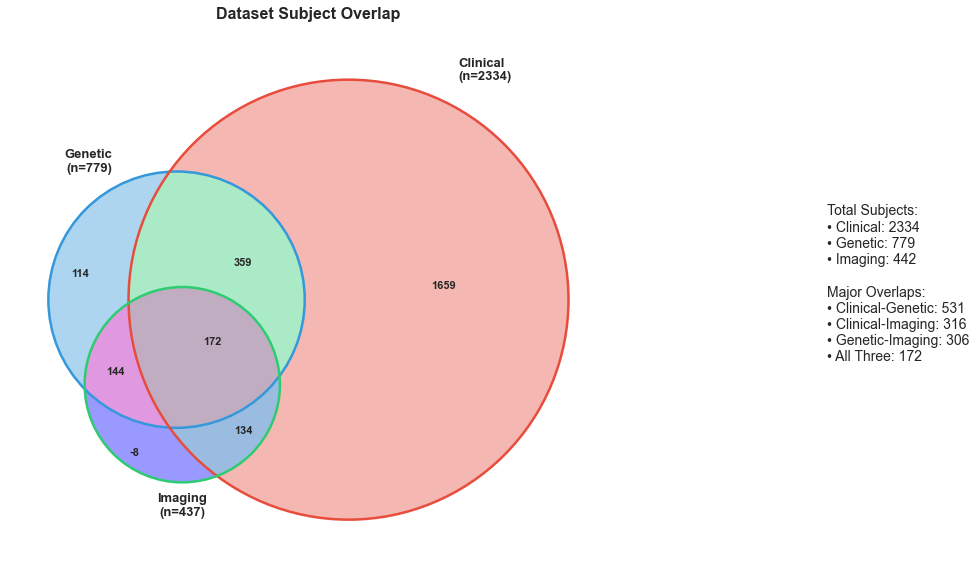

In [268]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
import numpy as np

def create_beautiful_venn(clinical_size=2334, genetic_size=779, imaging_size=442,
                        clinical_genetic=531, clinical_imaging=316, genetic_imaging=306,
                        all_three=172, save_path=None):
    
    # Set figure size and background style
    plt.figure(figsize=(12, 8))
    plt.style.use('seaborn')
    # Create the Venn diagram
    venn = venn3(subsets=(
        genetic_size - clinical_genetic - genetic_imaging + all_three,  # Genetic only
        clinical_size - clinical_genetic - clinical_imaging + all_three,  # Clinical only
        clinical_genetic - all_three,  # Genetic & Clinical
        imaging_size - clinical_imaging - genetic_imaging + all_three,  # Imaging only
        clinical_imaging - all_three,  # Clinical & Imaging
        genetic_imaging - all_three,  # Genetic & Imaging
        all_three  # All three
    ), set_labels=('Genetic\n(n=779)', 'Clinical\n(n=2334)', 'Imaging\n(n=437)'))
    
    # Customize colors with alpha transparency
    colors = ['#3498db', '#e74c3c', '#2ecc71']  # Blue, Red, Green
    alphas = [0.4, 0.4, 0.4]  # Transparency levels
    
    # Apply colors to the diagram
    for i, (color, alpha) in enumerate(zip(colors, alphas)):
        if venn.patches[i]:
            venn.patches[i].set_color(color)
            venn.patches[i].set_alpha(alpha)
    
    # Add circles with custom edge colors
    circles = venn3_circles(subsets=(
        genetic_size - clinical_genetic - genetic_imaging + all_three,
        clinical_size - clinical_genetic - clinical_imaging + all_three,
        clinical_genetic - all_three,
        imaging_size - clinical_imaging - genetic_imaging + all_three,
        clinical_imaging - all_three,
        genetic_imaging - all_three,
        all_three
    ), linewidth=2)
    
    # Customize circle edge colors
    for circle, color in zip(circles, colors):
        circle.set_edgecolor(color)
        circle.set_linewidth(2.5)
    
    # Customize text properties
    for text in venn.subset_labels:
        if text is not None:
            text.set_fontsize(11)
            text.set_fontweight('bold')
    
    for text in venn.set_labels:
        if text is not None:
            text.set_fontsize(13)
            text.set_fontweight('bold')
    
    # Add title
    plt.title('Dataset Subject Overlap', fontsize=16, fontweight='bold', pad=20)
    
    # Add summary text below
    summary_text = (
        f"Total Subjects:\n"
        f"• Clinical: {clinical_size}\n"
        f"• Genetic: {genetic_size}\n"
        f"• Imaging: {imaging_size}\n\n"
        f"Major Overlaps:\n"
        f"• Clinical-Genetic: {clinical_genetic}\n"
        f"• Clinical-Imaging: {clinical_imaging}\n"
        f"• Genetic-Imaging: {genetic_imaging}\n"
        f"• All Three: {all_three}"
    )
    
    plt.figtext(1.1, 0.5, summary_text, fontsize=14, ha='left', va='center')
    
    # Adjust layout
    plt.tight_layout()
    
    # Save if path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', dpi=600)
        
    return plt

# Create and display the diagram
venn_plot = create_beautiful_venn()

# Optional: save the plot
# venn_plot.savefig('venn_diagram.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()

<ipython-input-271-908298fa4065>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


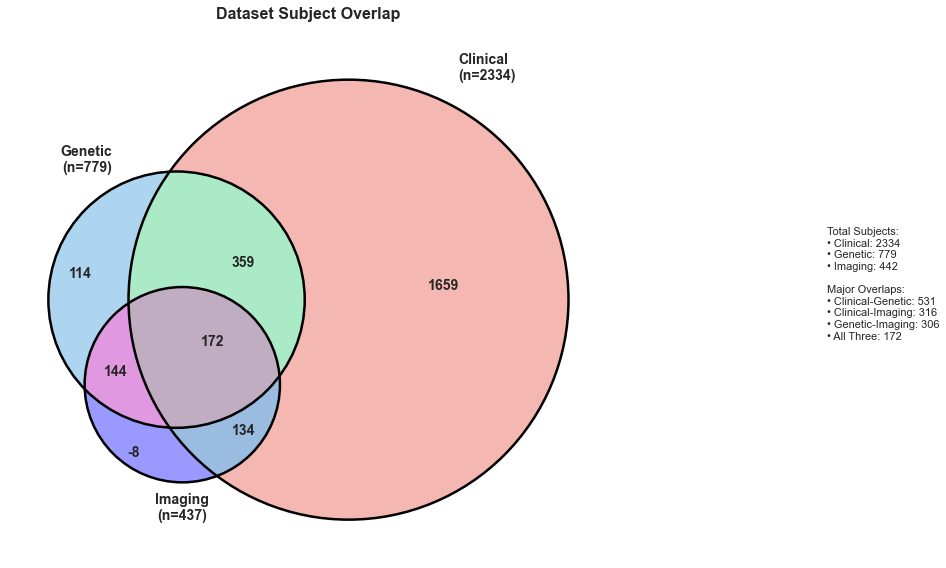

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
import numpy as np

def create_beautiful_venn(clinical_size=2334, genetic_size=779, imaging_size=442,
                        clinical_genetic=531, clinical_imaging=316, genetic_imaging=306,
                        all_three=172, save_path=None):
    
    # Set figure size and background style
    plt.figure(figsize=(12, 8))
    plt.style.use('seaborn')
    
    # Create the Venn diagram
    venn = venn3(subsets=(
        genetic_size - clinical_genetic - genetic_imaging + all_three,  # Genetic only
        clinical_size - clinical_genetic - clinical_imaging + all_three,  # Clinical only
        clinical_genetic - all_three,  # Genetic & Clinical
        imaging_size - clinical_imaging - genetic_imaging + all_three,  # Imaging only
        clinical_imaging - all_three,  # Clinical & Imaging
        genetic_imaging - all_three,  # Genetic & Imaging
        all_three  # All three
    ), set_labels=('Genetic\n(n=779)', 'Clinical\n(n=2334)', 'Imaging\n(n=437)'))
    
    # Customize colors with alpha transparency
    colors = ['#3498db', '#e74c3c', '#2ecc71']  # Blue, Red, Green
    alphas = [0.4, 0.4, 0.4]  # Transparency levels
    
    # Apply colors to the diagram
    for i, (color, alpha) in enumerate(zip(colors, alphas)):
        if venn.patches[i]:
            venn.patches[i].set_color(color)
            venn.patches[i].set_alpha(alpha)
    
    # Add circles with custom edge colors
    circles = venn3_circles(subsets=(
        genetic_size - clinical_genetic - genetic_imaging + all_three,
        clinical_size - clinical_genetic - clinical_imaging + all_three,
        clinical_genetic - all_three,
        imaging_size - clinical_imaging - genetic_imaging + all_three,
        clinical_imaging - all_three,
        genetic_imaging - all_three,
        all_three
    ), linewidth=2)
    
    # Customize circle edge colors
    for circle, color in zip(circles, colors):
        circle.set_edgecolor(color)
        circle.set_linewidth(2.5)
    
    # Customize text properties
    for text in venn.subset_labels:
        if text is not None:
            text.set_fontsize(14)
            text.set_fontweight('bold')
    
    for text in venn.set_labels:
        if text is not None:
            text.set_fontsize(14)
            text.set_fontweight('bold')
    
    # Add title
    plt.title('Dataset Subject Overlap', fontsize=16, fontweight='bold', pad=20)
    
    # Add summary text below
    summary_text = (
        f"Total Subjects:\n"
        f"• Clinical: {clinical_size}\n"
        f"• Genetic: {genetic_size}\n"
        f"• Imaging: {imaging_size}\n\n"
        f"Major Overlaps:\n"
        f"• Clinical-Genetic: {clinical_genetic}\n"
        f"• Clinical-Imaging: {clinical_imaging}\n"
        f"• Genetic-Imaging: {genetic_imaging}\n"
        f"• All Three: {all_three}"
    )
    
    plt.figtext(1.1, 0.5, summary_text, fontsize=11, ha='left', va='center')
    
    # Adjust layout
    plt.tight_layout()
    
    # Save if path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', dpi=300)
        
    return plt

# Create and display the diagram
venn_plot = create_beautiful_venn()

# Optional: save the plot
# venn_plot.savefig('venn_diagram.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()

<ipython-input-273-695cc587a814>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


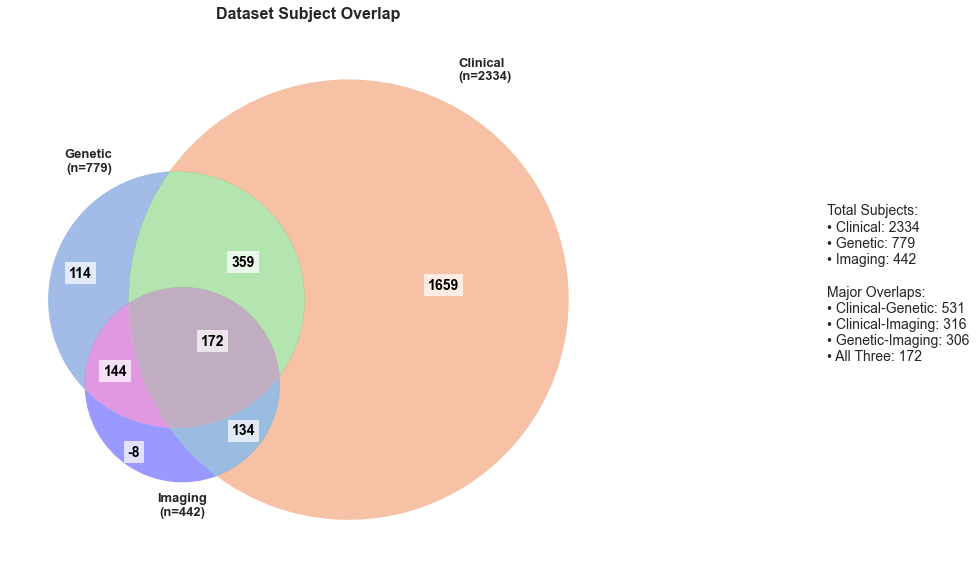

In [273]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
import numpy as np

def create_beautiful_venn(clinical_size=2334, genetic_size=779, imaging_size=442,
                        clinical_genetic=531, clinical_imaging=316, genetic_imaging=306,
                        all_three=172, save_path=None):
    
    # Set figure size and background style
    plt.figure(figsize=(12, 8))
    plt.style.use('seaborn')
    
    # Create the Venn diagram
    venn = venn3(subsets=(
        genetic_size - clinical_genetic - genetic_imaging + all_three,  # Genetic only
        clinical_size - clinical_genetic - clinical_imaging + all_three,  # Clinical only
        clinical_genetic - all_three,  # Genetic & Clinical
        imaging_size - clinical_imaging - genetic_imaging + all_three,  # Imaging only
        clinical_imaging - all_three,  # Clinical & Imaging
        genetic_imaging - all_three,  # Genetic & Imaging
        all_three  # All three
    ), set_labels=('Genetic\n(n=779)', 'Clinical\n(n=2334)', 'Imaging\n(n=442)'))
    
    # 论文级别的专业配色
    colors = ['#4878D0', '#EE854A', '#6ACC64']  # 专业蓝、橙、绿
    alphas = [0.5, 0.5, 0.5]  # 适中的透明度
    
    # Apply colors to the diagram
    for i, (color, alpha) in enumerate(zip(colors, alphas)):
        if venn.patches[i]:
            venn.patches[i].set_color(color)
            venn.patches[i].set_alpha(alpha)
    
    # Customize text properties
    for text in venn.subset_labels:
        if text is not None:
            text.set_fontsize(14)  
            text.set_fontweight('bold')
            text.set_color('black')
            text.set_bbox(dict(facecolor='white', alpha=0.7, edgecolor='none'))
    
    for text in venn.set_labels:
        if text is not None:
            text.set_fontsize(13)
            text.set_fontweight('bold')
    
    # Add title
    plt.title('Dataset Subject Overlap', fontsize=16, fontweight='bold', pad=20)
    
    # Add summary text below
    summary_text = (
        f"Total Subjects:\n"
        f"• Clinical: {clinical_size}\n"
        f"• Genetic: {genetic_size}\n"
        f"• Imaging: {imaging_size}\n\n"
        f"Major Overlaps:\n"
        f"• Clinical-Genetic: {clinical_genetic}\n"
        f"• Clinical-Imaging: {clinical_imaging}\n"
        f"• Genetic-Imaging: {genetic_imaging}\n"
        f"• All Three: {all_three}"
    )
    
    plt.figtext(1.1, 0.5, summary_text, fontsize=14, ha='left', va='center')
    
    # Adjust layout
    plt.tight_layout()
    
    # Save if path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', dpi=600)
        
    return plt

# Create and display the diagram
venn_plot = create_beautiful_venn()

# Optional: save the plot
venn_plot.savefig('venn_diagram.png', bbox_inches='tight', dpi=600)

# Show the plot
plt.show()